## Data Scrubbing
## Cast columns to proper types

In [1]:
# import library
import pandas as pd

data = pd.read_csv("data/heart.csv")

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Insepect each column individually and see there values

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
for col in data.columns:
    print(data[col].value_counts())

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
S

In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

AGE: 
* the dtype seems correct which is int64. 
* The ages dont seem ridiculous so it seems fine.

SEX:
* The dtype is in string format. 
* Need to cast the Males to 1 and Females to 0 to make it a binary category

ChestPainType: 
* The dtype is an object which suggests that the pain types are string 
* Create a mapping for the pain types and encode them since its a categorical column.
* If there ranked we need to respect that ranking 

RestingBP:
* The dtype is int64 which indicates its as expected. 
* This column is in mmHg which is not the same scale as the other numeric columns so it needs to be normalized
* There seems to be 1 value that is 0 mmHg which would indicate that the person would be dead so this must be a mistake. 
    * Drop that row.

Cholesterol:
* The dtype is int64 which indicates its as expected. 
* This column is in mm/dL which is not the same scale as the other numeric columns so it needs to be normalized
* It seems that we have concentrations as zero 172 times. Thats about 10 percent of the entire dataset. 
    * Even healthy people have some level of cholesterol so we should impute this value with the median so we can conserve those rows.

FastingBS:
* The dtpe is int64 which indicates its as expected as it is a binary category

RestingECG:
* Has three categories in string format. Which matched the dtype object. 
* Cast this column to numeric values. 
* This numeric values do not have to be ranked. 

MaxHR:
* Its as expeted which is a dtype of integer. Its simply the max heart rate acheived. 
* We need to normalize this column 

ExerciseAngina:
* Has a dtype of object which suggests its categorical which it is. 
* It should be binary 
    * We need to cast N = 0 (No), Y = 1 (Yes)

OldPeak: 
* The old peak is a cardiac stress test from the S to T wave. It represents the magnitude of ST segment depression during a cardiac stress test. This is also known as the 'depression' or 'depolarization' phase on the ECG waveform. Changes in the ST segment can indicate various cardiac conditions.
* It makes sense that the dtype = float. 
* We need to normalize this column

ST_Slope:
* Has the object dtype and has three categories. 
* Its a continuation of the OldPeak column except this time it simply labels it as Flat, Up, Down

HeartDisease: (Target)
* Its binary and integer based as expected

Lets begin by label encoding the following columns: 
* Sex
* ChestPainType
* ExcerciseAngina
* ST_Slope


In [5]:
"""
We have two binary columns that can be encoded using LabelEncoder. Those columns would be Sex and ExcerciseAngina
"""

# import label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Perform the numeric encoding
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [6]:
data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [7]:
data['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

Next we need to encode the nominal column for Chest Pain type

In [8]:
# Define an ordinal mapping dictionary for chest pain
chest_mapping = {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}
# Define an ordinal mapping dictionary for Slope
slope_mapping = {'Flat': 0, 'Down': 1, 'Up': 2}
# Define an ordinal mapping dictionary for ECG 
ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
# Apply ordinal encoding to the columns
data['ChestPainType'] = data['ChestPainType'].map(chest_mapping)
data['ST_Slope'] = data['ST_Slope'].map(slope_mapping)
data['RestingECG'] = data['RestingECG'].map(ecg_mapping)

In [9]:
data['ChestPainType'].value_counts()

0    496
1    203
2    173
3     46
Name: ChestPainType, dtype: int64

In [10]:
data['ST_Slope'].value_counts()

0    460
2    395
1     63
Name: ST_Slope, dtype: int64

In [11]:
data['RestingECG'].value_counts()

0    552
2    188
1    178
Name: RestingECG, dtype: int64

## Outlier Removal

Determine any outliers in our numeric columns

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(data, numeric_columns):
    # Determine the number of rows and columns in the subplot grid
    num_rows = (len(numeric_columns) + 1) // 2  # Calculate the number of rows (round up)
    num_cols = 2  # Fixed number of columns

    # Create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes array to handle varying numbers of subplots
    axes = axes.ravel()

    # Develop Boxplots to see outliers
    for idx, col in enumerate(numeric_columns):
        ax = axes[idx]
        sns.boxplot(x=col, data=data, palette='pastel', ax=ax)
        ax.set_ylabel('')
        ax.spines['top'].set_visible(False)
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.set_title(
            f'{col}',
            loc='right',
            weight='bold',
            fontsize=12
        )

    # Hide any unused subplots
    for i in range(len(numeric_columns), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

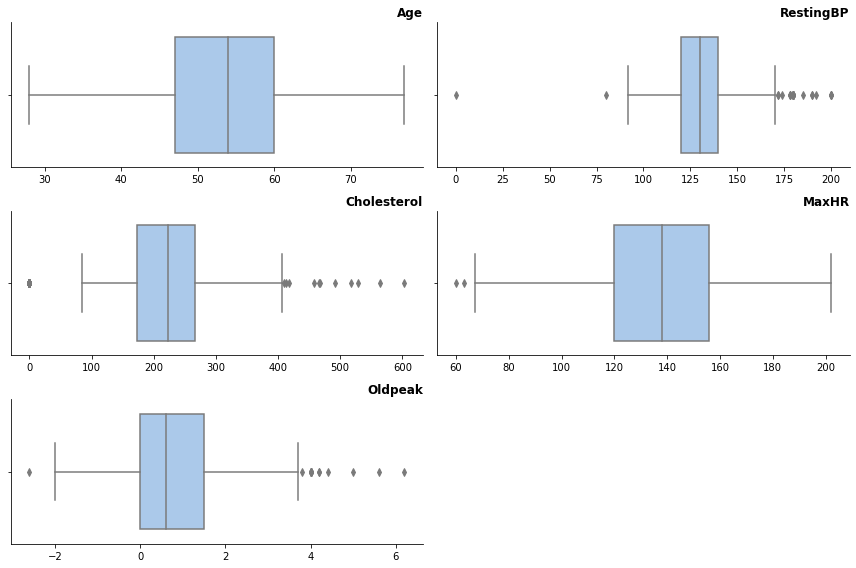

In [13]:
# subset our numeric data
num = 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

plot_boxplots(data, num)

The main consideration in removing outliers, is if any of the values here are possible to obtain, and if they are then we should consider keeping them. It would refelect actual real results. If this for some reason is a problem then after modeling we can consider removing the outliers

Age: 
* As long as we are under 100 or close to it then its fine. 
* This proves to be true so we keep all ages

Resting BP: 
* There are outliers however we need to consider the patients themselves. Some people can acheive very low BP since there atheletes. Its possible to have low resting BP because of [Hypotension](https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465). 
    * Anything below 90 mmHg is consider Hypotension. So this means that 78 mmHg is considered possible. 
    * There is one value that is zero which doesn't make sense so lets drop this row

Cholesterol: 
* The [ranges](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601) for cholesterol suggest that the only impossible level is the 0 mg/dL value.
* Drop that row

MaxHR: 
* Should keep all of it. All the listed Heart Rates are possible

Old Peak:
* All values are possible


In [14]:
import numpy as np
# Replace all zeros in RestingBP with NaN
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)

# Drop that NaN value row wise
data['RestingBP'].dropna(axis=0, inplace=True)
data['Cholesterol'].dropna(axis=0, inplace=True)

In [15]:
data['RestingBP'].value_counts()

120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
98.0       1
113.0      1
96.0       1
80.0       1
129.0      1
Name: RestingBP, Length: 66, dtype: int64

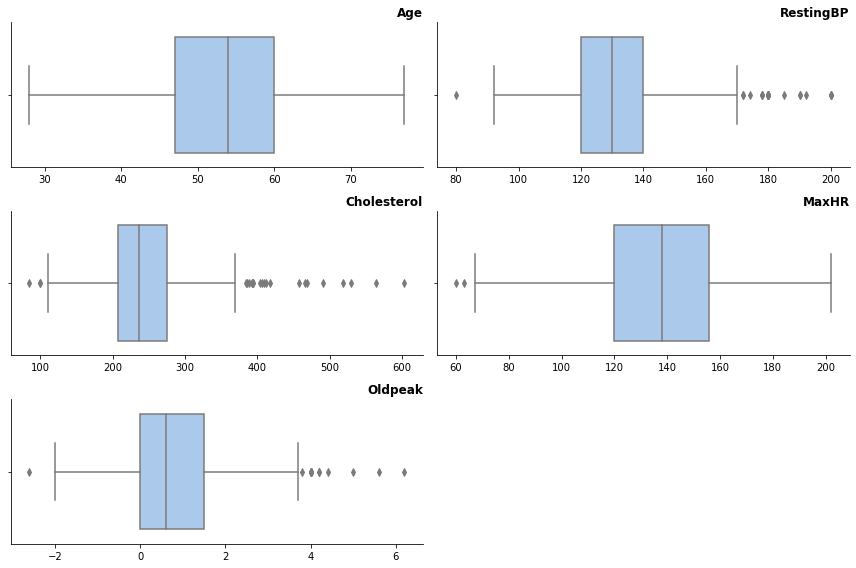

In [16]:
plot_boxplots(data, num)

In [17]:
data.shape

(918, 12)

Lets view a heatmap of the numeric columns and the target

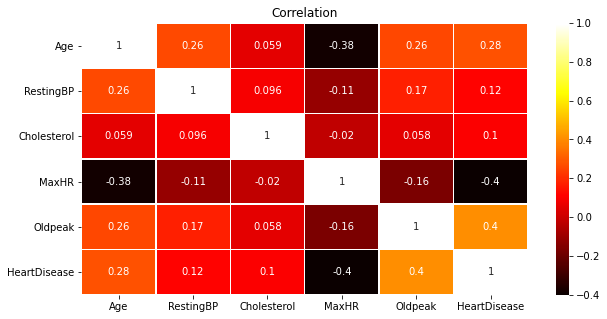

In [18]:
def correlation_heatmap(df: pd.core.frame.DataFrame, subset: list, target: str, title_name: str='Correlation'):
    # Include the target variable in the list of columns to display in the heatmap
    subset.append(target)
    # Subset the DataFrame to include only the selected columns
    subset_df = df[subset]
    corr = subset_df.corr()
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, linewidths=.5, cmap='hot', annot=True)
    plt.title(title_name)
    plt.show()

numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
correlation_heatmap(data, numeric, 'HeartDisease', 'Correlation')

We can see how Old Peak has the most correlation with Heart Disease. Max HR has the highest negative correlation. The other columns are not that high 

Lets look at the distribution of the features and target

In [19]:
def plot_column_distributions(df: pd.DataFrame):
    # Set the number of columns per row in the subplots
    columns_per_row = 3

    # Calculate the number of rows needed for subplots
    num_rows = (len(df.columns) + columns_per_row - 1) // columns_per_row

    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(df.columns):
        # Plot the histogram for each numeric column
        sns.histplot(data=df, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    # Remove any empty subplots
    for j in range(len(df.columns), num_rows * columns_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

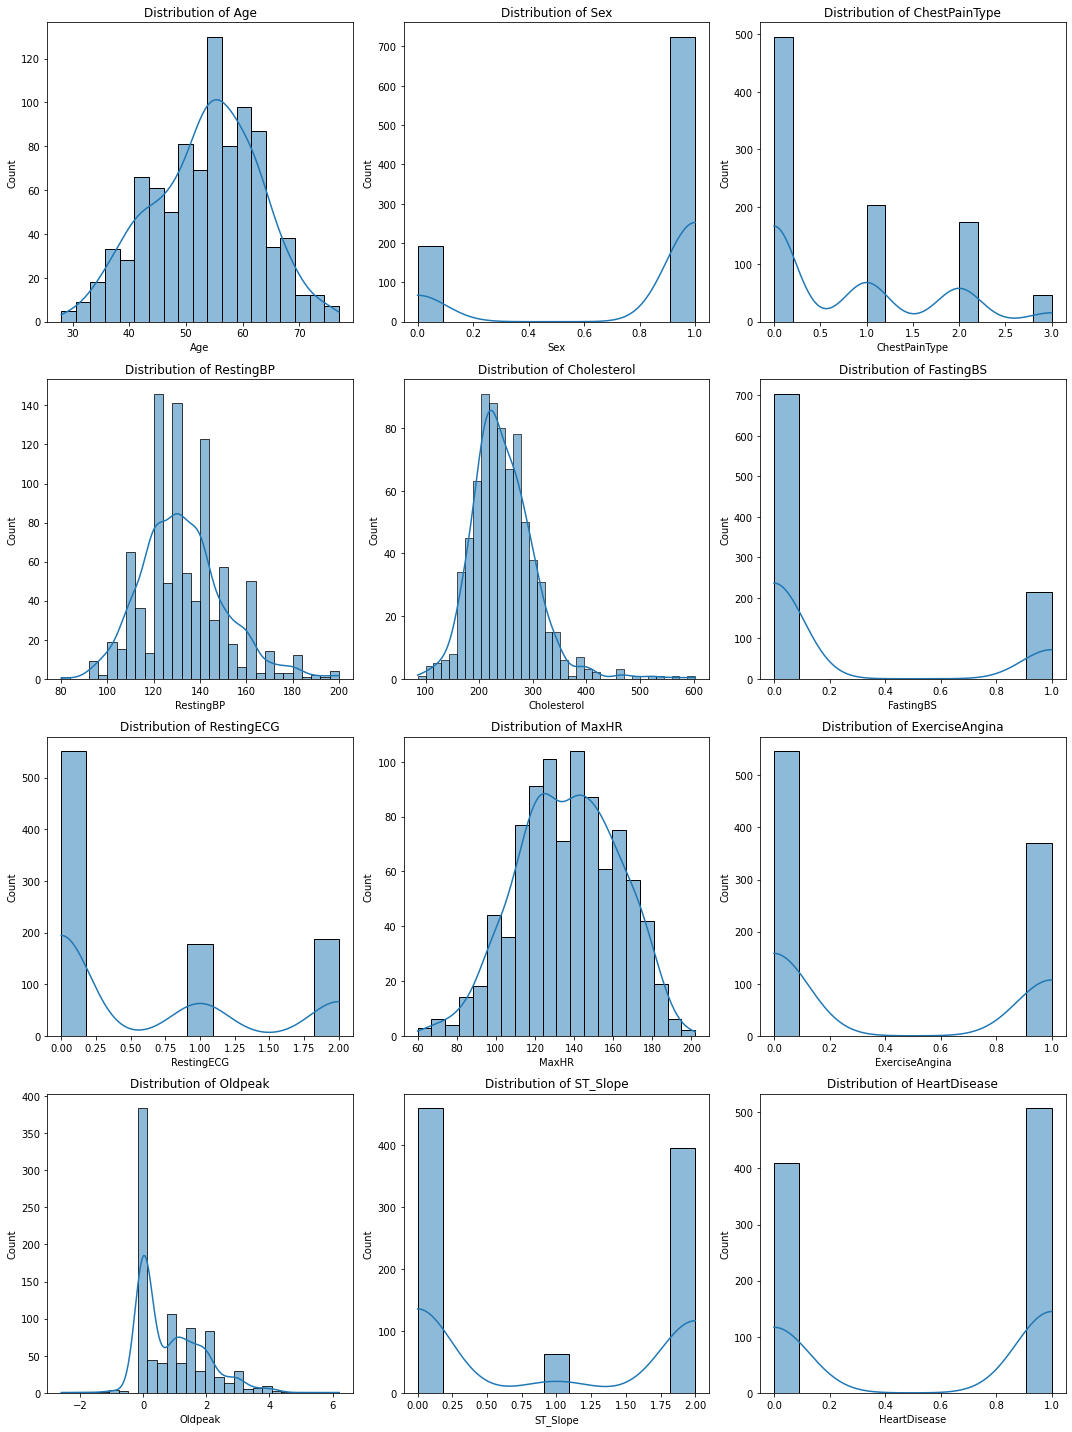

In [20]:
plot_column_distributions(data)

On the bright side our Target is balanced. Its almost 50-50. As mentioned before the numeric columns need to scaled. This should be perfomed after train test split to avoid data leakage. 

Lastly we need to address the outliers in the numeric columns if possible. Ideally with my domain knowledge we should not sacrfice many rows because all of these are possible values even though they are outliers. 

Lets see the tradeoff between removals

### Z-Score method

In [21]:
from scipy import stats

# Create a copy of the original DataFrame
data_z = data.copy()

# subset our numeric data
numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each numeric column and identify rows with outliers based on z-scores
for col in numeric:
    # Calculate z-scores for the current column
    z_scores = np.abs(stats.zscore(data_z[col]))
    
    # Identify outlier indices for the current column based on z-scores
    outlier_indices = np.where((z_scores>3))[0]
    # Drop outliers from DataFrame for the current column
    data_z.drop(data_z.index[outlier_indices], inplace=True)

# Reset the index of the cleaned DataFrame
data_z.reset_index(drop=True, inplace=True)

<ipython-input-21-ceb6250276ac>:15: RuntimeWarning: invalid value encountered in greater
  outlier_indices = np.where((z_scores>3))[0]


In [22]:
data.shape

(918, 12)

In [23]:
data_z.shape

(910, 12)

In [24]:
data_z.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       170
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [25]:
data_z.dropna(axis=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140.0,289.0,0,0,172,0,0.0,2,0
1,49,0,1,160.0,180.0,0,0,156,0,1.0,0,1
2,37,1,2,130.0,283.0,0,1,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,0,108,1,1.5,0,1
4,54,1,1,150.0,195.0,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
905,45,1,3,110.0,264.0,0,0,132,0,1.2,0,1
906,68,1,0,144.0,193.0,1,0,141,0,3.4,0,1
907,57,1,0,130.0,131.0,0,0,115,1,1.2,0,1
908,57,0,2,130.0,236.0,0,2,174,0,0.0,0,1


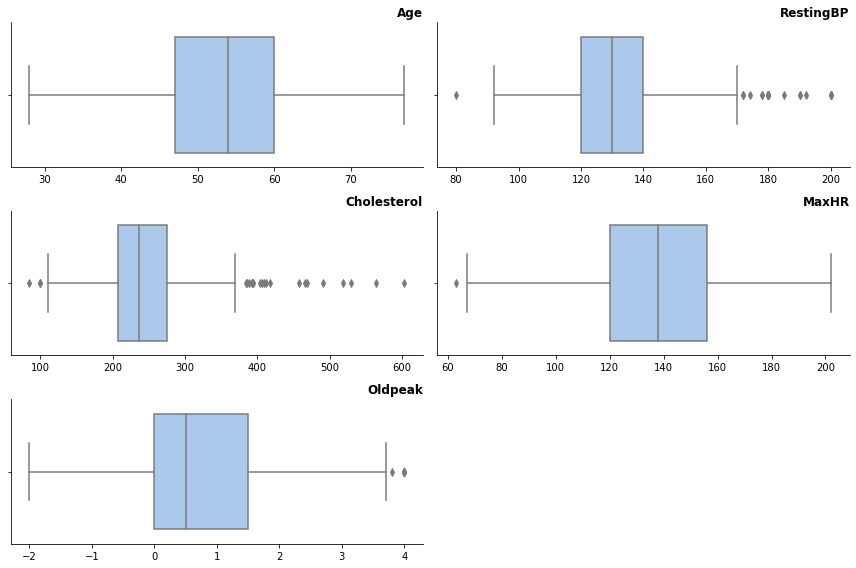

In [26]:
plot_boxplots(data_z, numeric)

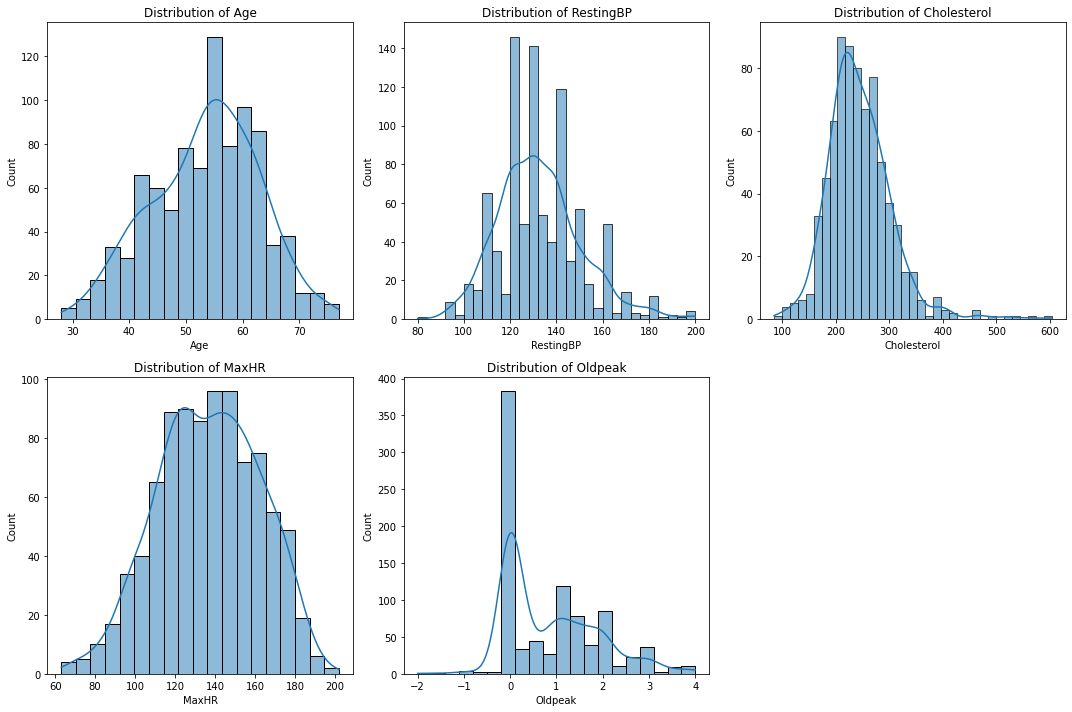

In [27]:
plot_column_distributions(data_z[numeric])

### Interquartile Range

In [28]:
# Create a copy of the original DataFrame
data_IQR = data.copy()

# Loop through each score column and remove outliers
for col in numeric:
    # Calculate Quartiles and IQR for the current column
    Q1 = data_IQR[col].quantile(0.25)
    Q3 = data_IQR[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier indices for the current column
    outlier_indices = data_IQR[(data_IQR[col] < lower_bound) | (data_IQR[col] > upper_bound)].index

    # Drop rows with outliers for the current column from the cleaned DataFrame
    data_IQR.drop(outlier_indices, inplace=True)

# Reset the index of the cleaned DataFrame
data_IQR.reset_index(drop=True, inplace=True)

In [29]:
data.shape

(918, 12)

In [30]:
data_IQR.shape

(854, 12)

In [31]:
data_IQR.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       162
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

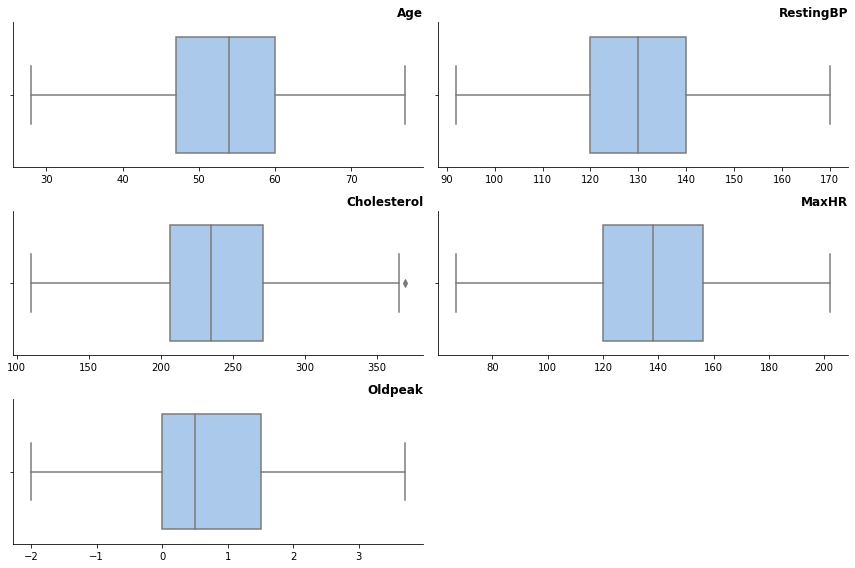

In [32]:
plot_boxplots(data_IQR, numeric)

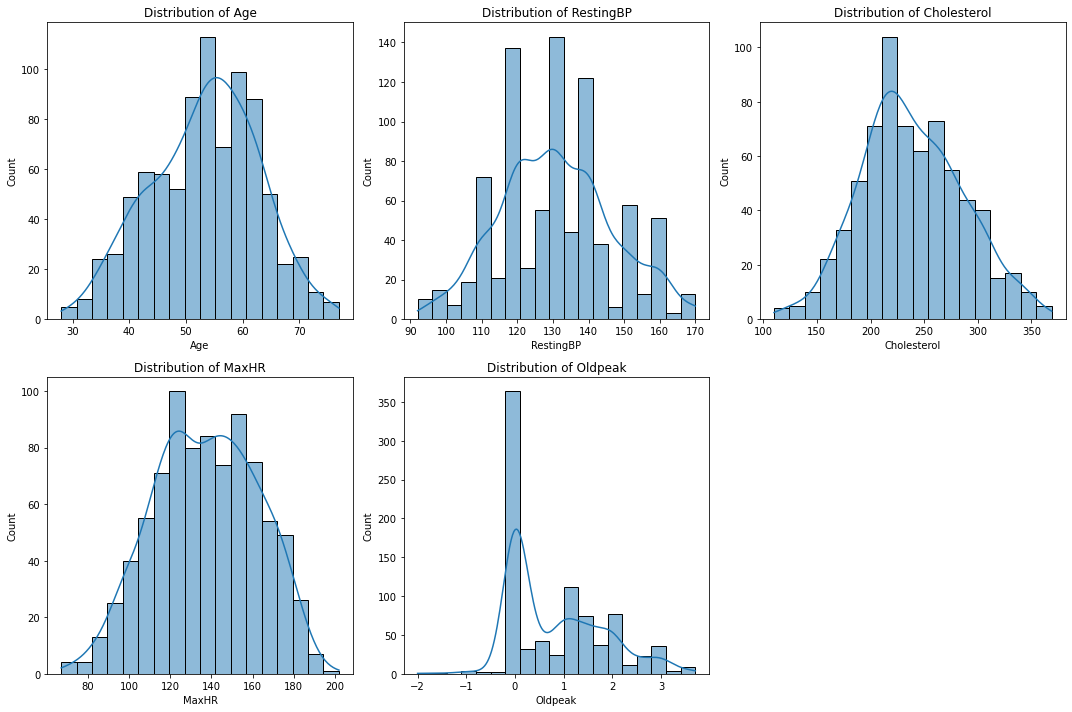

In [33]:
plot_column_distributions(data_IQR[numeric])

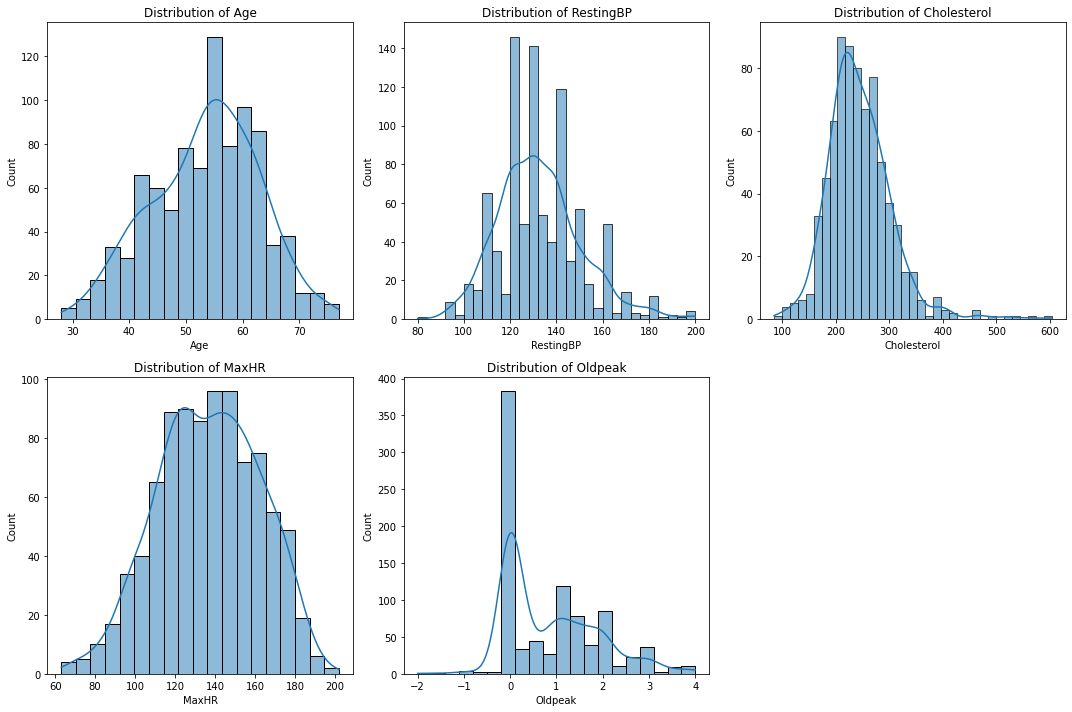

In [34]:
plot_column_distributions(data_z[numeric])

Similar result overall. Using the IQR sacrifices more rows however its model performance might be much better in comparison to the z-score data. The main issue here is the removal of cholesterial data. The IQR method doesn't have data for 500 and above. That is still possible according to the ranges for cholesterol. Instead it is probably more appropriate to use z-score method but use 2 std devations away. 

In [35]:
from scipy import stats

# Create a copy of the original DataFrame
data_z_2 = data.copy()

# subset our numeric data
numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each numeric column and identify rows with outliers based on z-scores
for col in numeric:
    # Calculate z-scores for the current column
    z_scores_2 = np.abs(stats.zscore(data_z_2[col]))
    
    # Identify outlier indices for the current column based on z-scores
    outlier_indices = np.where((z_scores_2>2))[0]
    
    # Drop outliers from DataFrame for the current column
    data_z_2.drop(data_z_2.index[outlier_indices], inplace=True)

# Reset the index of the cleaned DataFrame
data_z_2.reset_index(drop=True, inplace=True)

<ipython-input-35-371457553df9>:15: RuntimeWarning: invalid value encountered in greater
  outlier_indices = np.where((z_scores_2>2))[0]


In [36]:
data_z_2.shape

(825, 12)

In [37]:
data_z_2.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       148
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [38]:
data_z_2.dropna(axis=0, inplace=True)

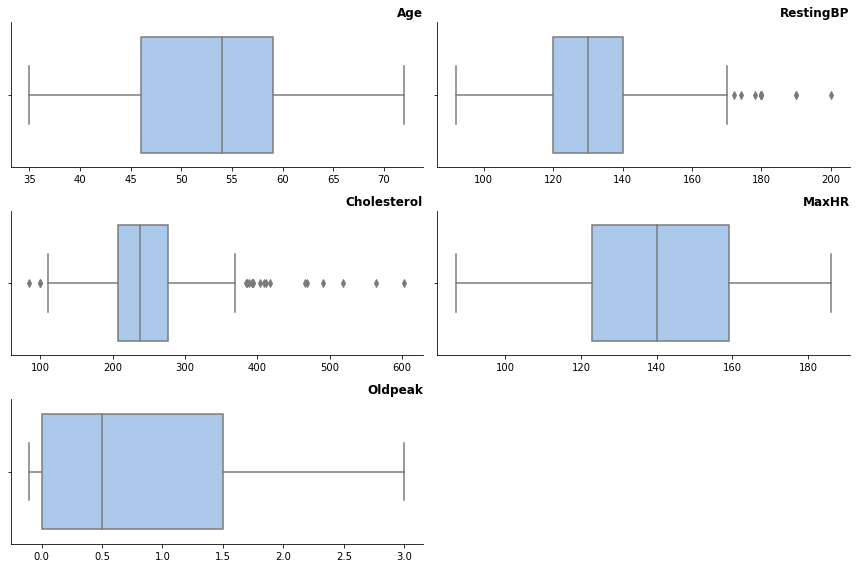

In [39]:
plot_boxplots(data_z_2, numeric)

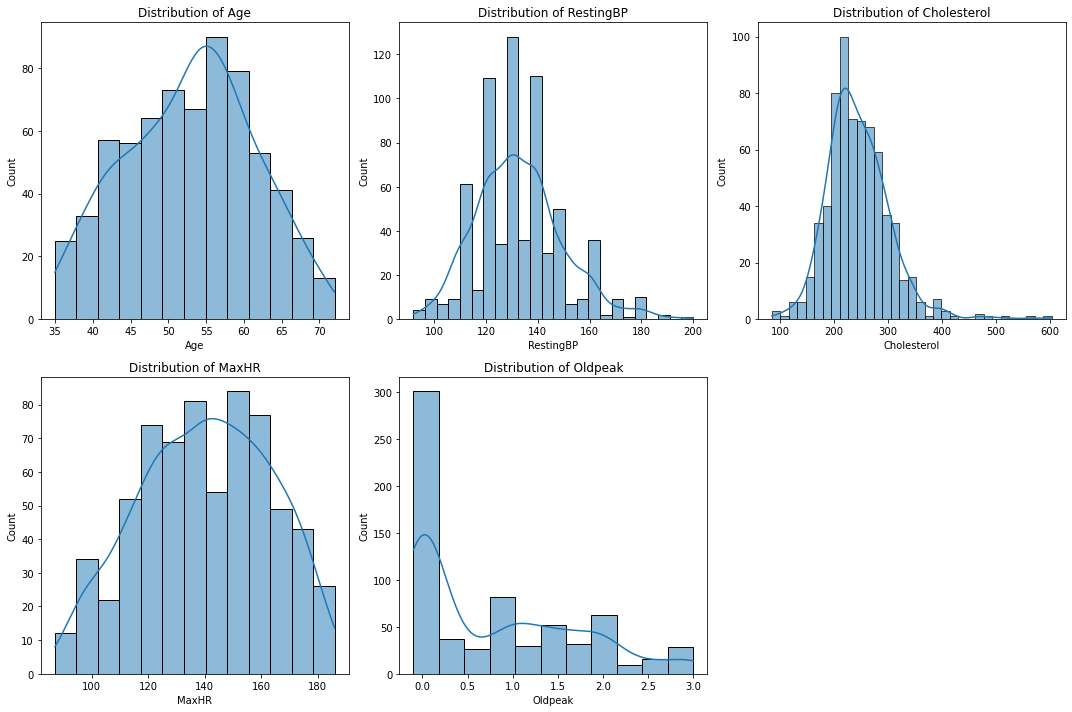

In [40]:
plot_column_distributions(data_z_2[numeric])

# Begin Modeling 

The overall process: 
1. Feature Engineer
    * Scaling the numeric features on the training set and training set after train test split to avoid data leakage.
2. Creata a Baseline Pipeline that will include the following types of models
    * LogisticClassifier()
    * RandomForest()
    * KNeighborsClassifier()
    * GradientBoostingClassifier()
    * XGBClassifier()
3. Evaluate the baselilne model performances
4. Creata a Optimization Pipeline with GridSearch CV
    * For this case modeling should be concerned with obtaining the best recall scores because the outcome of missing a patient with Heart Disease is much more catastrophic than the outcome of labeling them as a False Positive. Being more specific about the situation should be prioritized over sensitivity/precision. 
5. Evaluate the optimized model performances in comparison to the baseline models

## Feature Engineering

1. Split data into training and testing
2. Normalize the training data 
3. No need to One Hot Encode since we label encoded all the data already

In [41]:
# Import relevant libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, log_loss, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Define our Features and Target
X = data_z_2.drop(columns="HeartDisease")
y = data_z_2["HeartDisease"]

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define our numeric columns that need to be scaled.
num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Scale the numeric columns
# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the specified numeric columns in the training data
X_train_scaled = X_train.copy()
X_train_scaled.loc[:, num] = scaler.fit_transform(X_train[num])

# Transform the specified numeric columns in the test data using the same scaler
X_test_scaled = X_test.copy()
X_test_scaled.loc[:, num] = scaler.transform(X_test[num])


In [43]:
X_train_scaled.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

Seems that our scaler was able to scale everything to the same scale for continuous variables. Now the next step is to create baseline models

In [44]:
# Create Pipelines
# Define the pipelines for each algorithm Baseline
logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

ada_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(random_state=42))
])

gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(random_state=42))
])

def pipeline_eval(pipelines):
    for pipeline in pipelines:
        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)
        
        # Make predictions using the training data
        predictions = pipeline.predict(X_test)

        # Evaluate the pipeline's performance
        loss = log_loss(y_test, 
                        predictions,
        )
        report = classification_report(
            y_test, 
            predictions, 
            target_names = [
                "Absent Heart Disease", 
                "Present Heart Disease"
            ]
        )
        # print(f"Log Loss:{loss}")
        print("\n" + "=" * 40 + "\n")
        print(f"{pipeline.named_steps['classifier'].__class__.__name__} Classification Report:\n", report)
        print(f"{pipeline} Log Loss:\n", loss)
        print("\n" + "=" * 40 + "\n")
    
    # Plot ROC curves for all pipelines
    plt.figure(figsize=(10, 8))
    lw = 2
    
    for pipeline in pipelines:    
        
        # Make predictions using the probability estimates
        if hasattr(pipeline.named_steps['classifier'], 'predict_proba'): # Check if the classifier has predict_proba attribute since some classifiers we are using do not support decison_function
            y_train_score = pipeline.predict_proba(X_train)[:, 1]
            y_test_score = pipeline.predict_proba(X_test)[:, 1]
        else:
            # Handle classifiers that don't support predict_proba
            y_train_score = pipeline.decision_function(X_train)
            y_test_score = pipeline.decision_function(X_test)

        # Calculate ROC curve
        train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
        test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

        # Calculate AUC
        train_auc = auc(train_fpr, train_tpr)
        test_auc = auc(test_fpr, test_tpr)

        # Print AUC values
        classifier_name = pipeline.named_steps['classifier'].__class__.__name__
        print(f"{classifier_name} Train AUC: {train_auc}")
        print(f"{classifier_name} Test AUC: {test_auc}")
    #     y_train_score = pipeline.decision_function(X_train)
    #     y_test_score = pipeline.decision_function(X_test)

    #     train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    #     test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
        
    #     classifier_name = pipeline.named_steps['classifier'].__class__.__name__
        plt.plot(test_fpr, test_tpr, lw=lw, label=f'{classifier_name} ROC curve')
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




LogisticRegression Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.88      0.87      0.87        92
Present Heart Disease       0.85      0.86      0.85        78

             accuracy                           0.86       170
            macro avg       0.86      0.86      0.86       170
         weighted avg       0.86      0.86      0.86       170

Pipeline(steps=[('classifier', LogisticRegression(random_state=42))]) Log Loss:
 4.672949719130048




RandomForestClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.88      0.85      0.86        92
Present Heart Disease       0.83      0.86      0.84        78

             accuracy                           0.85       170
            macro avg       0.85      0.85      0.85       170
         weighted avg       0.85      0.85      0.85       170

Pipeline(steps=[('classifier', RandomForest

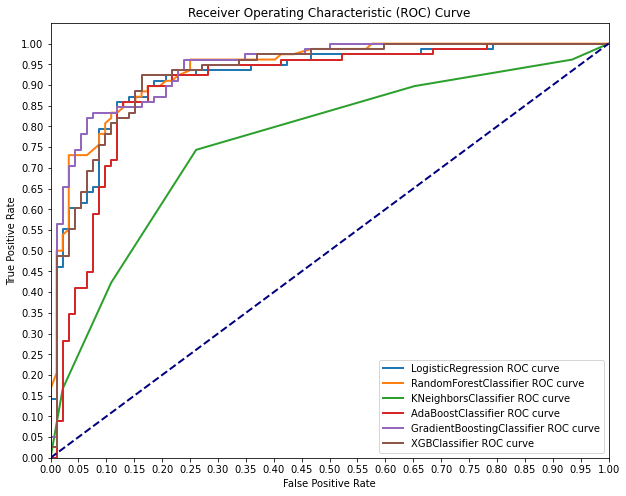

In [45]:
# Fit and evaluate the each baseline pipeline
pipelines = [logreg_pipeline, rf_pipeline, knn_pipeline, ada_pipeline, gb_pipeline, xgb_pipeline]

pipeline_eval(pipelines)

### Baseline Evaluations

Observations:

Overall, all classifiers did really good for baseline. We can see how on some classifiers such as Random Forest, KNeighbors, AdaBoost, and XGB show overfitting due to there drops in Testing AUC in comparison to Training AUC. We will have to attempt to fix these overfits with GridSearch.


LogisticRegression: 
* LogisticRegression Train AUC: 0.928332551961244
* LogisticRegression Test AUC: 0.9204292084726868
* Log LossL: 4.672949719130048


                                precision    recall  f1-score   support

        Absent Heart Disease       0.88      0.87      0.87        92
        Present Heart Disease      0.85      0.86      0.85        78

                accuracy                               0.86       170
                
RandomForest:
* RandomForestClassifier Train AUC: 1.0
* RandomForestClassifier Test AUC: 0.9421683389074693
* Log Loss: 4.2666111733075684

                                precision    recall  f1-score   support

        Absent Heart Disease       0.90      0.87      0.88        92
        Present Heart Disease      0.85      0.88      0.87        78

                accuracy                               0.88       170

KNeighbors: 
* KNeighborsClassifier Train AUC: 0.8315049226441631
* KNeighborsClassifier Test AUC: 0.7639353400222966
* Log Loss: 8.939560892437616

                                precision    recall  f1-score   support

        Absent Heart Disease       0.77      0.74      0.76        92
        Present Heart Disease      0.71      0.74      0.72        78

                accuracy                               0.74       170

AdaBoost:
* AdaBoostClassifier Train AUC: 0.963947491795593
* AdaBoostClassifier Test AUC: 0.8974358974358975
* Log Loss: 5.2824528343494705

                                precision    recall  f1-score   support

        Absent Heart Disease       0.84      0.88      0.86        92
        Present Heart Disease      0.85      0.81      0.83        78

                accuracy                               0.85       170

GradientBoost:
* GradientBoostingClassifier Train AUC: 0.9957805907172995
* GradientBoostingClassifier Test AUC: 0.9406354515050167
* Log Loss: 5.688819601257721

                                precision    recall  f1-score   support

        Absent Heart Disease       0.87      0.82      0.84        92
        Present Heart Disease      0.80      0.86      0.83        78

                accuracy                               0.84       170

XtremeGradientBoost:
* XGBClassifier Train AUC: 1.0
* XGBClassifier Test AUC: 0.9282329988851727
* Log Loss: 5.485636217803595

                                precision    recall  f1-score   support

        Absent Heart Disease       0.86      0.85      0.85        92
        Present Heart Disease      0.82      0.83      0.83        78

                accuracy                               0.84       170

## Optimize Models

Define the parameters we want to explore for every model type.

In [46]:
# Define hyperparameters for Logistic Regression
logreg_params = {
    'classifier__C': np.logspace(-3, 16, 6), # Generates values from 0.001 to 1E16. Makes 6 values
    'classifier__penalty': ['None', 'l1', 'l2', 'elasticnet'],
    'classifier__max_iter': [100, 500, 1000, 2000, 5000, 7000],
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__fit_intercept': [True, False]
}

# Define hyperparameters for Random Forest
rf_params = {
    'classifier__n_estimators': [10, 50, 100, 200, 250, 300], # default is 100
    'classifier__criterion': ['gini', 'entropy', 'log_loss'], # default is gini
    'classifier__max_depth': [None, 5, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10, 15, 20, 30],
    'classifier__min_samples_leaf': [1, 5, 10, 15, 20]
}

# Define hyperparameters for KNeighborsClassifier
knn_params = {
    'classifier__n_neighbors': [5, 8, 10, 15, 20, 25],
    'classifier__weights': ['uniform', 'distance'], # default uniform
    'classifier__leaf_size': [15, 30, 45, 60],
    'classifier__p': [1, 2]
}

ada_params = {
    'classifier__n_estimators': [10, 50, 100, 200, 250, 300],
    'classifier__learning_rate': [ 0.1, 0.5, 1.0, 1.5, 2.0, 2.5] # Default is 1.0
}

# Define hyperparameters for Gradient Boosting
gb_params = {
    'classifier__loss': ['log_loss', 'exponential'],
    'classifier__n_estimators': [50, 60, 70, 80, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # default is 0.1
    'classifier__criterion': ['friedman_mse', 'squared_error'],
    'classifier__subsample': [0.4,0.6,0.7,0.8],
    'classifier__max_depth': [None, 2, 3, 4, 5, 10],
    'classifier__min_samples_leaf': [2,3,4,5]
}

# Define hyperparameters for XGBoost
xgb_params = {
    'classifier__n_estimators': [10, 50, 100, 200, 250, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__max_depth': [None, 2, 3, 4, 5, 10],
    'classifier__booster': ['gbtree', 'gblinear', 'dart']
}

pipelines = [
    (logreg_pipeline, logreg_params),
    (rf_pipeline, rf_params),
    (knn_pipeline, knn_params),
    (ada_pipeline, ada_params),
    (gb_pipeline, gb_params), 
    (xgb_pipeline, xgb_params)
]

Create a function to find the best models given the parameters

In [47]:
def find_best_model(pipeline, params, X_train, y_train):
    grid_search = GridSearchCV(pipeline, params, cv=5, verbose=1, n_jobs=-1, scoring='recall')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

Tuning Pipeline(steps=[('classifier', LogisticRegression(random_state=42))])...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2583 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    5.0s finished
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to c



LogisticRegression Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.88      0.87      0.87        92
Present Heart Disease       0.85      0.86      0.85        78

             accuracy                           0.86       170
            macro avg       0.86      0.86      0.86       170
         weighted avg       0.86      0.86      0.86       170

Pipeline(steps=[('classifier',
                 LogisticRegression(C=6.30957344480193, fit_intercept=False,
                                    random_state=42))]) Log Loss:
 4.672949719130048


Tuning Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])...
Fitting 5 folds for each of 3780 candidates, totalling 18900 fits


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 12004 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 14304 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 16804 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 18869 out of 18900 | elapsed:  4.1min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 18900 out of 18900 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]



RandomForestClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.89      0.86      0.87        92
Present Heart Disease       0.84      0.87      0.86        78

             accuracy                           0.86       170
            macro avg       0.86      0.87      0.86       170
         weighted avg       0.87      0.86      0.86       170

Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                                        min_samples_split=20,
                                        random_state=42))]) Log Loss:
 4.6729544226443425


Tuning Pipeline(steps=[('classifier', KNeighborsClassifier())])...
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.




KNeighborsClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.79      0.75      0.77        92
Present Heart Disease       0.72      0.77      0.75        78

             accuracy                           0.76       170
            macro avg       0.76      0.76      0.76       170
         weighted avg       0.76      0.76      0.76       170

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=10, p=1,
                                      weights='distance'))]) Log Loss:
 8.330048370189603


Tuning Pipeline(steps=[('classifier', AdaBoostClassifier(random_state=42))])...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:    2.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.2s finished




AdaBoostClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.88      0.85      0.86        92
Present Heart Disease       0.83      0.86      0.84        78

             accuracy                           0.85       170
            macro avg       0.85      0.85      0.85       170
         weighted avg       0.85      0.85      0.85       170

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=42))]) Log Loss:
 5.0792976719811165


Tuning Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])...
Fitting 5 folds for each of 13440 candidates, totalling 67200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4756 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 5474 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 6404 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 11435 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 12820 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 18232 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 20052 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 25954 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 32056 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 42800 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 67200 out of 67200 | elapsed:  3.7min finished




GradientBoostingClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.88      0.85      0.86        92
Present Heart Disease       0.83      0.86      0.84        78

             accuracy                           0.85       170
            macro avg       0.85      0.85      0.85       170
         weighted avg       0.85      0.85      0.85       170

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            loss='exponential', max_depth=10,
                                            min_samples_leaf=2, n_estimators=80,
                                            random_state=42, subsample=0.4))]) Log Loss:
 5.0792976719811165


Tuning Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                          

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  3.6min finished




XGBClassifier Classification Report:
                        precision    recall  f1-score   support

 Absent Heart Disease       0.89      0.85      0.87        92
Present Heart Disease       0.83      0.87      0.85        78

             accuracy                           0.86       170
            macro avg       0.86      0.86      0.86       170
         weighted avg       0.86      0.86      0.86       170

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
    

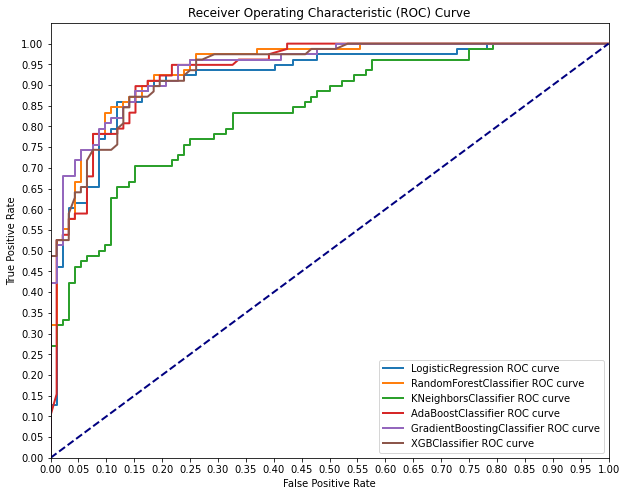

In [48]:

best_models = []

for pipeline, params in pipelines:
    print(f"Tuning {pipeline}...")
    
    # Find the best model for the current pipeline
    best_model = find_best_model(pipeline, params, X_train, y_train)
    
    # Fit the best model on the training data
    best_model.fit(X_train, y_train)
    
    # Make predictions using the best model
    predictions = best_model.predict(X_test)
    
    # Evaluate the best model's performance
    loss = log_loss(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=["Absent Heart Disease", "Present Heart Disease"])
    
    # Print the evaluation results
    print("\n" + "=" * 40 + "\n")
    print(f"{best_model.named_steps['classifier'].__class__.__name__} Classification Report:\n", report)
    print(f"{best_model} Log Loss:\n", loss)
    print("\n" + "=" * 40 + "\n")
    
    # Add the best model to the list
    best_models.append(best_model)
    
# Plot ROC curves for all best models
plt.figure(figsize=(10, 8))
lw = 2

for best_model in best_models:
    if hasattr(best_model.named_steps['classifier'], 'predict_proba'):
        y_train_score = best_model.predict_proba(X_train)[:, 1]
        y_test_score = best_model.predict_proba(X_test)[:, 1]
    else:
        y_train_score = best_model.decision_function(X_train)
        y_test_score = best_model.decision_function(X_test)

    train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    classifier_name = best_model.named_steps['classifier'].__class__.__name__
    print(f"{classifier_name} Train AUC: {train_auc}")
    print(f"{classifier_name} Test AUC: {test_auc}")
    plt.plot(test_fpr, test_tpr, lw=lw, label=f'{classifier_name} ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

After doing an exhastive grid search we have the following results:

Logistic Regression:
* Train AUC: 0.9282856696358807
* Test AUC: 0.9183389074693422
* Log Loss: 4.672949719130048

                                precision    recall  f1-score   support

         Absent Heart Disease       0.88      0.87      0.87        92
        Present Heart Disease       0.85      0.86      0.85        78

                    accuracy                            0.86       170
                    macro avg       0.86      0.86      0.86       170
                    weighted avg    0.86      0.86      0.86       170

    * The AUC scores are close, indicating a reasonable fit. There's no significant overfitting or underfitting.
    * Pipeline(steps=[('classifier',
                 LogisticRegression(C=6.30957344480193, fit_intercept=False,
                                    random_state=42))])

Random Forest Classifier:
* Train AUC: 0.9665572745741522
* Test AUC: 0.9420289855072463
* Log Loss: 4.6729544226443425

                                precision    recall  f1-score   support

         Absent Heart Disease       0.89      0.86      0.87        92
        Present Heart Disease       0.84      0.87      0.86        78

                    accuracy                            0.86       170
                    macro avg       0.86      0.87      0.86       170
                weighted avg        0.87      0.86      0.86       170

    * The AUC scores are also close, suggesting a well-fitted model with low overfitting.
    * Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                        n_estimators=200, random_state=42))])

K-Nearest Neighbors (KNN):
* KNeighborsClassifier Train AUC: 1.0
* KNeighborsClassifier Test AUC: 0.8369565217391304
* Log Loss: 8.330048370189603

                                precision    recall  f1-score   support

        Absent Heart Disease        0.79      0.75      0.77        92
        Present Heart Disease       0.72      0.77      0.75        78

                    accuracy                            0.76       170
                    macro avg       0.76      0.76      0.76       170
                weighted avg        0.76      0.76      0.76       170

    * The high Train AUC and much lower Test AUC suggest overfitting. The model performs exceptionally well on the training data but struggles to generalize to unseen data.
    * Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_neighbors=20, p=1,
                                      weights='distance'))])

AdaBoost Classifier:
* Train AUC: 0.943264572589467
* Test AUC: 0.9331103678929766
* Log Loss: 5.0792976719811165

                                precision    recall  f1-score   support

         Absent Heart Disease       0.88      0.85      0.86        92
        Present Heart Disease       0.83      0.86      0.84        78

                    accuracy                            0.85       170
                    macro avg       0.85      0.85      0.85       170
                weighted avg        0.85      0.85      0.85       170  

    * The AUC scores are close, indicating a reasonably good fit with a minimal overfitting issue.
    * Pipeline(steps=[('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

Gradient Boosting Classifier:
* Train AUC: 0.996890139084232
* Test AUC: 0.9414715719063546
* Log Loss:  5.0792976719811165

                                precision    recall  f1-score   support

        Absent Heart Disease        0.88      0.85      0.86        92
        Present Heart Disease       0.83      0.86      0.84        78

                    accuracy                            0.85       170
                    macro avg       0.85      0.85      0.85       170
                weighted avg        0.85      0.85      0.85       170

    * The AUC scores are clode, suggesting a well fitted model with minimal overfitting.
    * Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            loss='exponential', max_depth=2,
                                            min_samples_leaf=5,
                                            n_estimators=150, random_state=42,
                                            subsample=0.8))])

XGBoost Classifier:
* Train AUC: 0.9347632442569151
* Test AUC: 0.9361761426978819
* Log Loss: 4.6729544226443425

                                precision    recall  f1-score   support

        Absent Heart Disease        0.89      0.85      0.87        92
        Present Heart Disease       0.83      0.87      0.85        78

                    accuracy                            0.86       170
                    macro avg       0.86      0.86      0.86       170
                weighted avg        0.86      0.86      0.86       170

    
    * This model also exhibits a good balance between Train and Test AUC.
    * Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

# Evaluation

Overall Picks: 
1. Logistic Classification model 
    
    Its complexity is simple. Its discrimination power is on the high end sitting at around .91 for both test and 
    train data. Its accuracy is good but not high sitting at 86%. 

2. Random Forest model

    Its complexity is higher than a logistic classification model and takes longer to train. The result are similar to the Logistic Classification however the precision and recall have a good balance in comaprison to the logistic classification. I am saying this because the results of the random forest in teh details match up more with the concern of the problem of missing True Positives. The logistic classification is more prone to this eventhough they have the same f1-score and accuracy. The recall on the random forest to detect Heart disease is .87 while the logistic classification is .86. It also shows slight overfit.

2. Xtreme Gradient Boost model
    
    This model is more complex in nature than both Random Forests and Logistic Model. Its discrimination power (recall) is not higher than the the random forests but its slightly higher for the Logistic Classification model. This model's Area Under the Receiver Operating Characteristic Curve is .93 for training and .93 for testing. It signifies no overfit. This model overall performs the best accoring to the AUC for the ROC in comparison to the Random Forests and Logistic Classifier. 

Final Model: 

    * Xtreme Gradient Boost did the best in discriminative power because of its higher AUC of the ROC, recall scores line up better with the areas of concern in diagnosting Heart Disease. 
    
    Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

# Feature Importance